<a href="https://colab.research.google.com/github/kishanAk21/Time_Series_Forecasting/blob/main/time_series_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting: Gold Price 

In [147]:
# Dependencies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. Reading Dataset

In [148]:
# Reading Dataset

data = pd.read_csv('Gold_Daily.csv')
print(data.shape)
data.head()

(6886, 7)


,Date,Price,Open,High,Low,Vol,Change %
0,"Dec 06, 1994",375.8,375.6,376.5,375.1,0.99K,0.0008
1,"Dec 07, 1994",376.1,377.0,377.5,375.1,1.88K,0.0008
2,"Dec 08, 1994",376.6,375.3,376.7,374.8,0.48K,0.0013
3,"Dec 09, 1994",377.0,375.6,377.0,375.5,0.38K,0.0011
4,"Dec 12, 1994",377.5,376.8,377.8,376.5,0.07K,0.0013


# 2. Pre-processing Dataset

In [149]:
# Pre-processing Dataset

data = data[['Date', 'Price']]
data.Date = pd.to_datetime(data.Date, format='%b %d, %Y')
data.set_index('Date', drop=True, inplace=True)
print(data.shape)
data.head()

(6886, 1)


,Price
Date,
1994-12-06,375.8
1994-12-07,376.1
1994-12-08,376.6
1994-12-09,377.0
1994-12-12,377.5


In [150]:
import datetime
from datetime import timedelta

base = datetime.datetime(data.index.min().year, data.index.min().month, data.index.min().day)
arr = np.array([base + datetime.timedelta(days=i) for i in range((data.index.max() - data.index.min()).days+1)])

data_temp = pd.DataFrame(arr, columns=['date']).set_index('date', drop=True)
print(data_temp.shape)
data_temp.head(10)

(9863, 0)


""
date
1994-12-06
1994-12-07
1994-12-08
1994-12-09
1994-12-10
1994-12-11
1994-12-12
1994-12-13
1994-12-14


In [151]:
data = pd.merge(left=data_temp, right=data,
                     left_on=data_temp.index, right_on=data.index,
                     how='left')
data.head(10)
data.set_index('key_0', drop=True, inplace=True)

In [152]:
data.fillna(method='ffill', inplace=True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9863 entries, 1994-12-06 to 2021-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9863 non-null   float64
dtypes: float64(1)
memory usage: 154.1 KB


In [154]:
data.head(10)

,Price
key_0,
1994-12-06,375.8
1994-12-07,376.1
1994-12-08,376.6
1994-12-09,377.0
1994-12-10,377.0
1994-12-11,377.0
1994-12-12,377.5
1994-12-13,377.6
1994-12-14,378.9


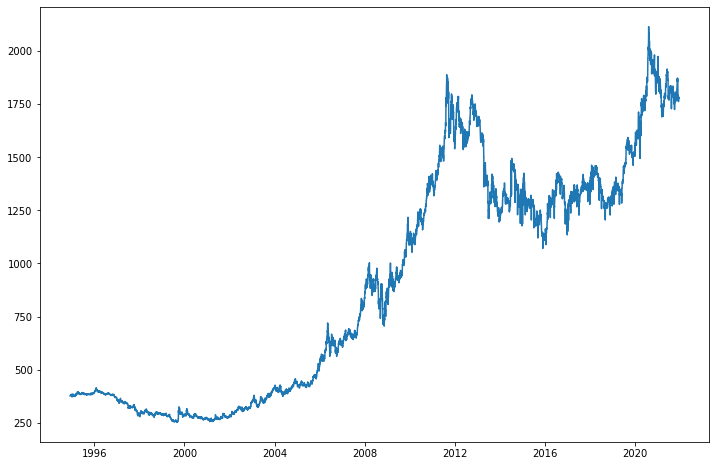

In [155]:
plt.plot(data)

# 3. Time Series Analysis

## Outlier detection

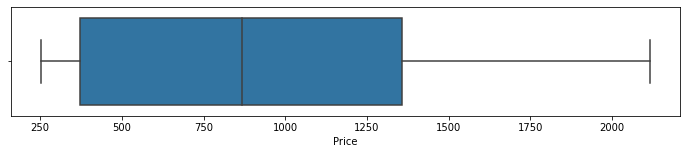

In [156]:
# Box plot

import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Price'],whis=1.5)

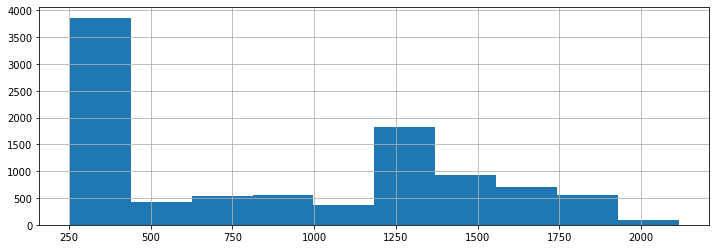

In [157]:
# Histogram

fig = data['Price'].hist(figsize = (12,4))

There are no outliers present as per `box plot` and `histogram`.

# 4. Time Series Forecasting

In [158]:
# Train-Test split

train_len = int(data.shape[0]*0.8) # 80-20 split
train = data[0:train_len] 
test = data[train_len:] 

## Comparing Different Time Series Forecasting Methods

## 1. Naive Method

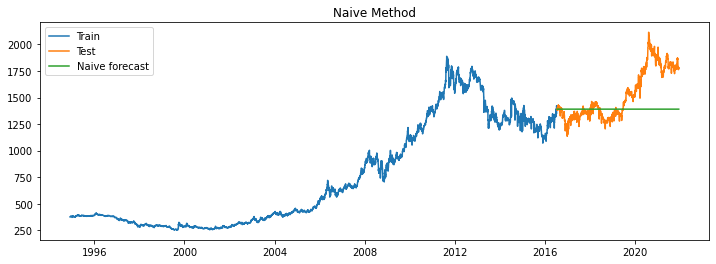

,Method,RMSE,MAPE
0,Naive method,265.47,11.36


In [159]:
# Mapping to previous value
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]


# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()


# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

## 2. Simple Average Method

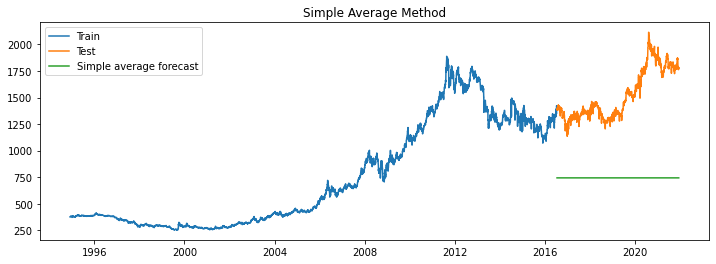

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27


In [160]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()


# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()


# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## 3. Simple Moving Average Method

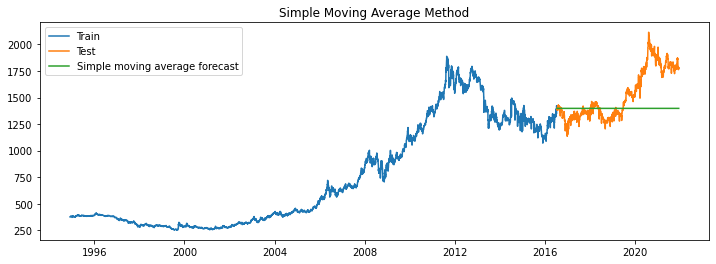

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36


In [161]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]


# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'][train_len:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()


# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## 4. Holt's Method with Trend

{'smoothing_level': 0.8946598528591148, 'smoothing_slope': 8.393162133270263e-05, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 375.7999484955241, 'initial_slope': 0.299973100763191, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


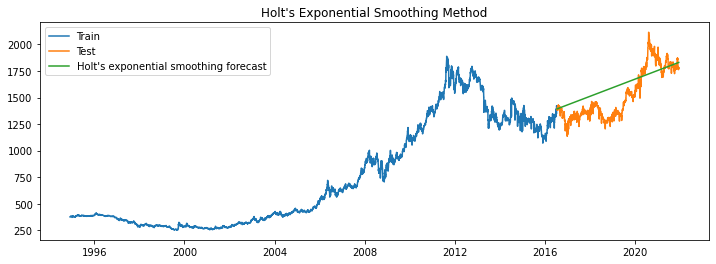

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50


In [162]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))


# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()


# Calculate RSME and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## 5. Holt Winters' additive method with trend and seasonality

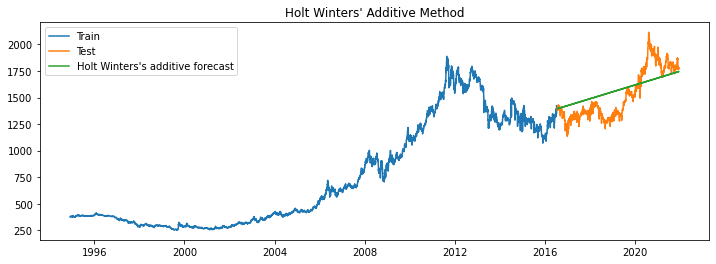

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50
0,Holt Winters' additive method,157.24,9.04


In [163]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
# print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(test.shape[0])


# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()


# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## 6. Holt Winter's multiplicative method with trend and seasonality

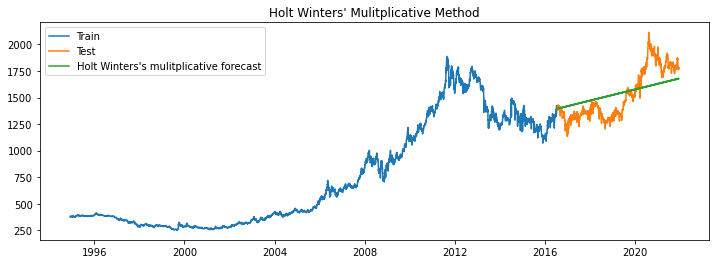

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50
0,Holt Winters' additive method,157.24,9.04
0,Holt Winters' multiplicative method,164.23,9.07


In [164]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
# print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(test.shape[0])


# Plotting
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc = 'best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()


# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwm['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

### Augmented Dickey-Fuller (ADF) test

In [165]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Price'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.206908
Critical Values @ 0.05: -2.86
p-value: 0.937693


### Box Cox transformation to make variance constant

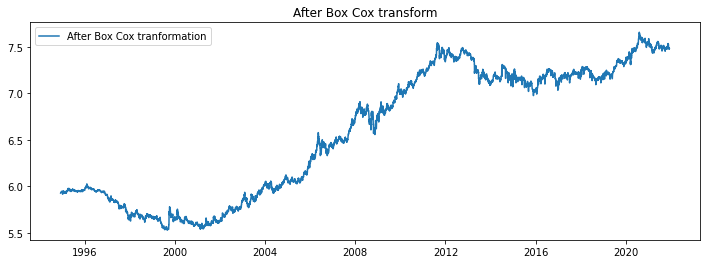

In [166]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Price'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

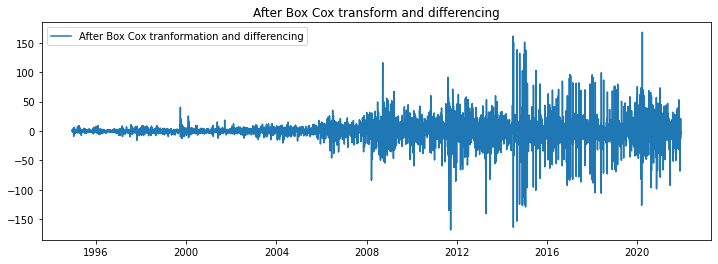

In [167]:
data_boxcox_diff = pd.Series(data['Price'] - data['Price'].shift(2), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [168]:
data_boxcox_diff.dropna(inplace=True)

### Augmented Dickey-Fuller (ADF) test

In [169]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -16.466994
Critical Values @ 0.05: -2.86
p-value: 0.000000


## Autocorrelation function (ACF)

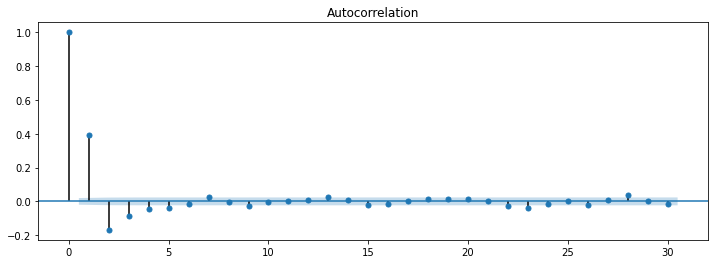

In [170]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

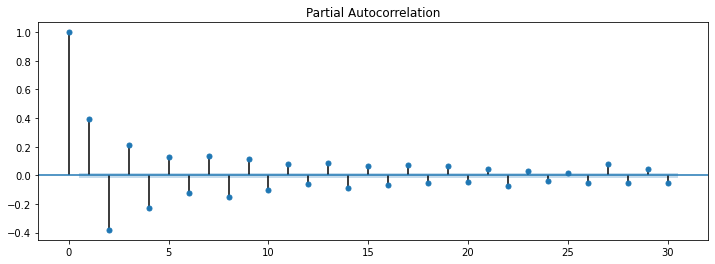

In [171]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

Observations,

- Series differencing is required to remove the trend.
- Auto-correlation suggests 4/5th order dependency.

In [172]:
# Train-test split (after box-cox)

train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

## 7. Auto regressive integrated moving average (ARIMA)

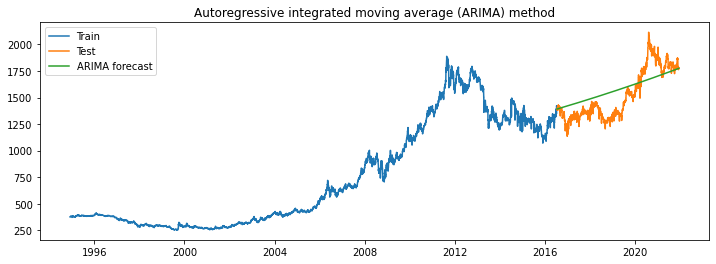

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50
0,Holt Winters' additive method,157.24,9.04
0,Holt Winters' multiplicative method,164.23,9.07
0,Autoregressive integrated moving average (ARIM...,152.86,8.74


In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 2, 1), seasonal_order=(0, 0, 0, 0)) 
model_fit = model.fit()
# print(model_fit.params)


# Recover Original Series
y_hat_arima = test_data_boxcox.copy()
y_hat_arima['arima_forecast_boxcox'] = model_fit.predict(test_data_boxcox.index.min(), test_data_boxcox.index.max())
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])


# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()


# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_arima['arima_forecast'][test.index.min():])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## 8. Seasonal auto regressive integrated moving average (SARIMA)

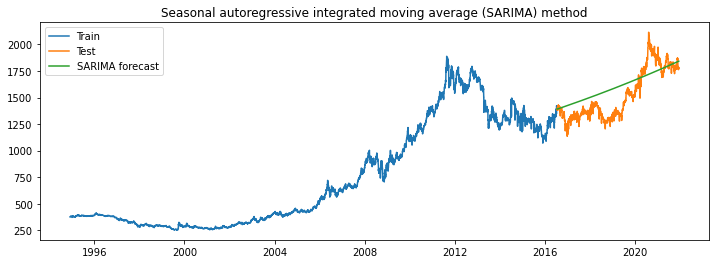

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50
0,Holt Winters' additive method,157.24,9.04
0,Holt Winters' multiplicative method,164.23,9.07
0,Autoregressive integrated moving average (ARIM...,152.86,8.74
0,Seasonal autoregressive integrated moving aver...,155.63,9.09


In [174]:
model = SARIMAX(train_data_boxcox, order=(1, 2, 1), seasonal_order=(1, 0, 1, 7)) 
model_fit = model.fit()
# print(model_fit.params)


# Recover Original Series
y_hat_sarima = test_data_boxcox.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(test_data_boxcox.index.min(), test_data_boxcox.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])


# Plotting
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()


# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## 9. Deep Learning: GRU

In [175]:
data_1 = data.reset_index().drop('key_0', axis=1)
data_1.head()

,Price
0,375.8
1,376.1
2,376.6
3,377.0
4,377.0


In [176]:
train_data_1 = data_1[:train_len]
test_data_1 = data_1[train_len:]

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data_1)
test_scaled = scaler.transform(test_data_1)

In [178]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)


LOOK_BACK = 30 # Monthly look back

In [179]:
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)

# Print data shape
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape) 
print('y_test.shape:', y_test.shape)

X_train.shape: (7860, 30, 1)
y_train.shape: (7860, 1)
X_test.shape: (1943, 30, 1)
y_test.shape: (1943, 1)


In [180]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, Dropout, GRU

model = Sequential()
model.add(GRU (units = 64, return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
model.add(Dropout(0.2)) 
model.add(GRU(units = 64)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_36 (GRU)                (None, 30, 64)            12864     
                                                                 
 dropout_33 (Dropout)        (None, 30, 64)            0         
                                                                 
 gru_37 (GRU)                (None, 64)                24960     
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [182]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           patience = 10)

history = model.fit(X_train, y_train, epochs = 100,  
                    validation_split = 0.2,
                    batch_size = 16, 
                    shuffle = False, 
                    callbacks = [early_stop])


Epoch 1/100
393/393 [==============================] - 13s 27ms/step - loss: 8.0638e-04 - val_loss: 0.0122
Epoch 2/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 3/100
393/393 [==============================] - 9s 24ms/step - loss: 0.0022 - val_loss: 0.0189
Epoch 4/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0034 - val_loss: 0.0429
Epoch 5/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0040 - val_loss: 0.0535
Epoch 6/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0046 - val_loss: 0.0257
Epoch 7/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0043 - val_loss: 0.0090
Epoch 8/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0029 - val_loss: 8.7524e-04
Epoch 9/100
393/393 [==============================] - 9s 23ms/step - loss: 0.0016 - val_loss: 2.5762e-04
Epoch 10/100
393/393 [==============================] - 9s 24ms/step 

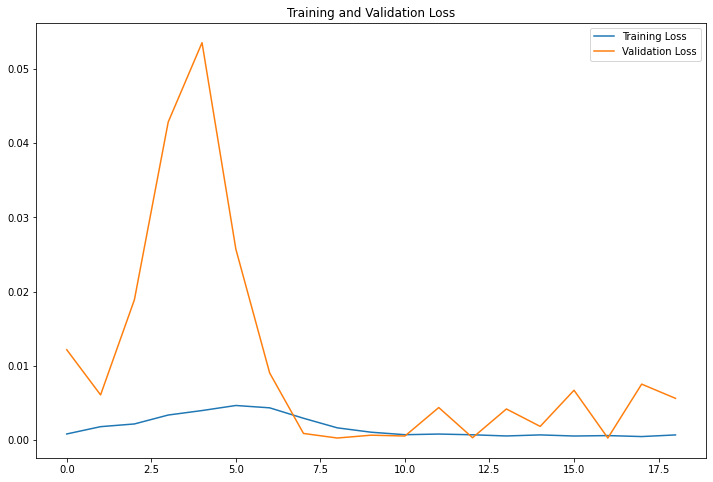

In [183]:
# Ploting results

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [184]:
y_test_ = scaler.inverse_transform(y_test)
y_train_ = scaler.inverse_transform(y_train)

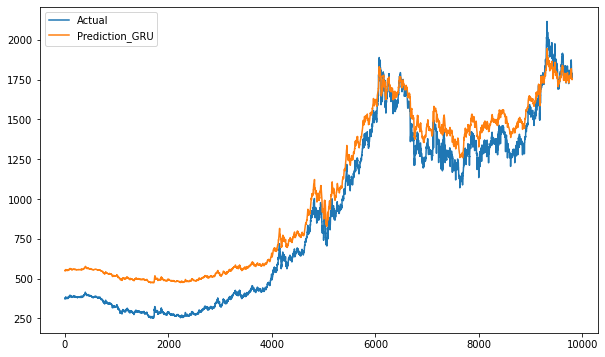

In [185]:
# Make prediction
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

prediction_train = model.predict(X_train)
prediction_train = scaler.inverse_transform(prediction_train)


# Plot test data vs prediction

plt.figure(figsize=(10, 6))
range_future = len(prediction)
# plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
plt.plot(np.concatenate((y_train_, y_test_), axis=0), label='Actual')
plt.plot(np.concatenate((prediction_train, prediction), axis=0), label='Prediction_GRU')
plt.legend(loc='upper left')


In [186]:
rmse = np.sqrt(mean_squared_error(y_test_, prediction)).round(2)
mape = np.round(np.mean(np.abs(y_test_ - prediction)/y_test_)*100,2)

tempResults = pd.DataFrame({'Method':['Deep Learning: GRU'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50
0,Holt Winters' additive method,157.24,9.04
0,Holt Winters' multiplicative method,164.23,9.07
0,Autoregressive integrated moving average (ARIM...,152.86,8.74
0,Seasonal autoregressive integrated moving aver...,155.63,9.09
0,Deep Learning: GRU,107.94,6.84


## 10. Deep Learning: GRU + Attention

In [187]:
inputs = keras.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = GRU(units = 64, return_sequences = True)(inputs)
x = Dropout(0.2)(x)
output_tensor = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=64, dropout=0.2, output_shape=1)(x, x, return_attention_scores=False)
x = tf.squeeze(output_tensor, axis=-1)
outputs = Dense(units = 1)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 30, 1)]      0           []                               
                                                                                                  
 gru_38 (GRU)                   (None, 30, 64)       12864       ['input_30[0][0]']               
                                                                                                  
 dropout_35 (Dropout)           (None, 30, 64)       0           ['gru_38[0][0]']                 
                                                                                                  
 multi_head_attention_29 (Multi  (None, 30, 1)       12545       ['dropout_35[0][0]',             
 HeadAttention)                                                   'dropout_35[0][0]']      

In [188]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           patience = 10)

history = model.fit(X_train, y_train, epochs = 100,  
                    validation_split = 0.2,
                    batch_size = 16, 
                    shuffle = False, 
                    callbacks = [early_stop])

Epoch 1/100
393/393 [==============================] - 9s 18ms/step - loss: 0.0013 - val_loss: 0.0366
Epoch 2/100
393/393 [==============================] - 6s 16ms/step - loss: 0.0040 - val_loss: 0.0230
Epoch 3/100
393/393 [==============================] - 6s 16ms/step - loss: 0.0028 - val_loss: 0.0241
Epoch 4/100
393/393 [==============================] - 7s 17ms/step - loss: 0.0027 - val_loss: 0.0285
Epoch 5/100
393/393 [==============================] - 7s 17ms/step - loss: 0.0032 - val_loss: 0.0426
Epoch 6/100
393/393 [==============================] - 6s 16ms/step - loss: 0.0045 - val_loss: 0.0335
Epoch 7/100
393/393 [==============================] - 7s 17ms/step - loss: 0.0055 - val_loss: 0.0209
Epoch 8/100
393/393 [==============================] - 6s 16ms/step - loss: 0.0047 - val_loss: 0.0235
Epoch 9/100
393/393 [==============================] - 6s 16ms/step - loss: 0.0040 - val_loss: 0.0165
Epoch 10/100
393/393 [==============================] - 6s 16ms/step - loss: 0.002

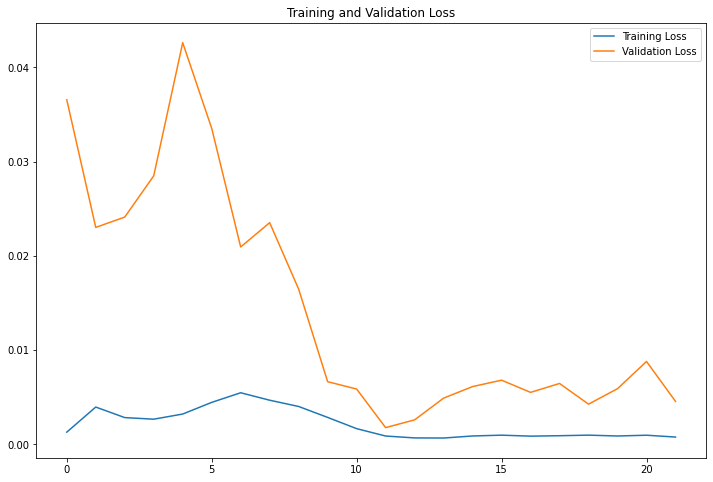

In [189]:
# Ploting results

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

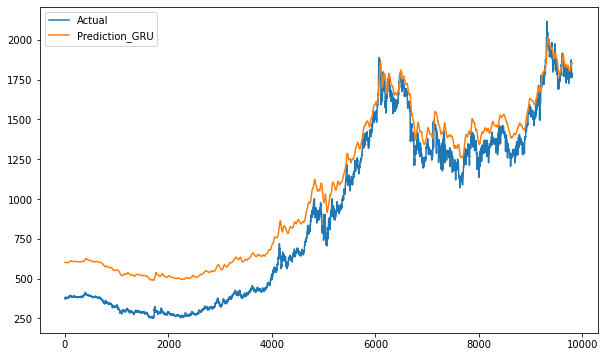

In [190]:
# Make prediction
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

prediction_train = model.predict(X_train)
prediction_train = scaler.inverse_transform(prediction_train)


# Plot test data vs prediction

plt.figure(figsize=(10, 6))
range_future = len(prediction)
# plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
plt.plot(np.concatenate((y_train_, y_test_), axis=0), label='Actual')
plt.plot(np.concatenate((prediction_train, prediction), axis=0), label='Prediction_GRU')
plt.legend(loc='upper left')

In [191]:
rmse = np.sqrt(mean_squared_error(y_test_, prediction)).round(2)
mape = np.round(np.mean(np.abs(y_test_ - prediction)/y_test_)*100,2)

tempResults = pd.DataFrame({'Method':['Deep Learning: GRU + Attention'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,265.47,11.36
0,Simple average method,815.58,50.27
0,Simple moving average forecast,261.81,11.36
0,Holt's exponential smoothing method,161.78,9.50
0,Holt Winters' additive method,157.24,9.04
0,Holt Winters' multiplicative method,164.23,9.07
0,Autoregressive integrated moving average (ARIM...,152.86,8.74
0,Seasonal autoregressive integrated moving aver...,155.63,9.09
0,Deep Learning: GRU,107.94,6.84
0,Deep Learning: GRU + Attention,89.27,5.56


Conclusion:  

- `Holt's` methods give similar performance output as `S+AR+I+MA` methods.
- `Deep learning` based methods are dominating in terms of performance with increased computational cost.

-----------